# Segmentation Test for Fusion

pycodex version 0.1.6

In [1]:
from pycodex import io, markerim, metadata, utils
from pycodex import visualization as vis
from pycodex.data_process import crop
from tifffile import tifffile

io.setup_gpu("0,1,2,3")

2024-10-26 03:06:50,761 - INFO - Using GPU(s): ['/physical_device:GPU:0', '/physical_device:GPU:1', '/physical_device:GPU:2', '/physical_device:GPU:3']


# 00. Crop region

In [2]:
qptiff_path = "/mnt/nfs/home/stephanieyiu/Periodontal/Periodontal_CODEX-S8_Scan1.er.qptiff"
im = tifffile.imread(qptiff_path)


In [3]:
markerlist_path = "/mnt/nfs/home/wenruiwu/projects/steph_periodontal/data/raw/MarkerList.txt"
with open(markerlist_path, "r") as f:
    marker_list = f.read().splitlines()
marker_list = [
    io.rename_invalid_marker(marker)
    for marker in marker_list
    # if len(marker) > 0 and not re.match(r"blank", marker, re.IGNORECASE)
]
marker_list = io.rename_duplicate_markers(marker_list)


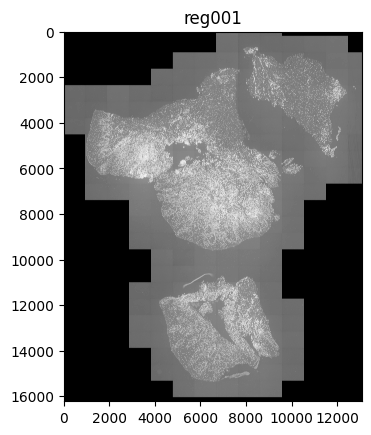

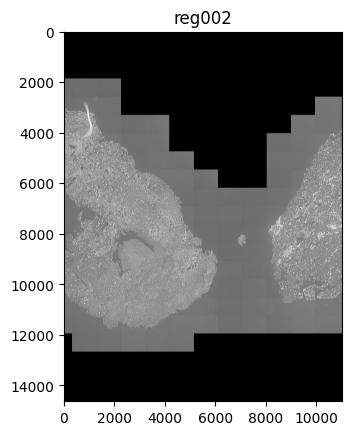

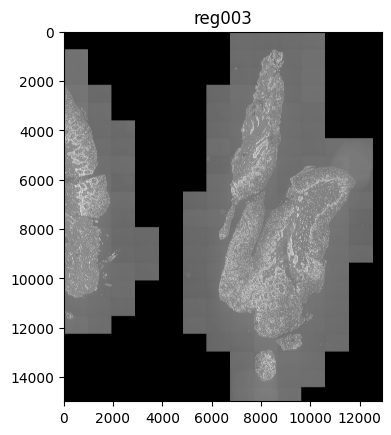

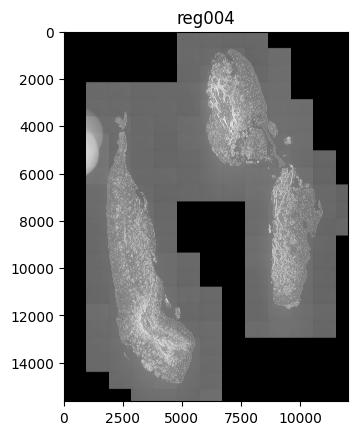

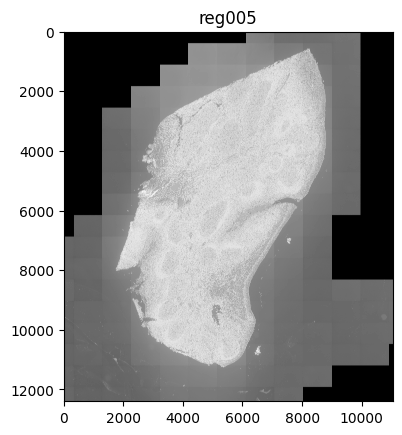

In [4]:
crop_data_path = "/mnt/nfs/home/wenruiwu/projects/steph_periodontal/data/raw/periodontal_crop_data.txt"
centroids, areas, perimeters, names = crop.parse_crop_data(crop_data_path)
tiff_size = utils.get_tiff_size(qptiff_path)
pixel_width, pixel_height = tiff_size["pixel_width_um"], tiff_size["pixel_height_um"]
rectangles = crop.crop_and_display(im, centroids, areas, perimeters, names, pixel_width, pixel_height)


In [5]:
# base = "/mnt/nfs/home/wenruiwu/projects/steph_periodontal/data/output"
# for i, (x1, y1, x2, y2) in tqdm(enumerate(rectangles), total=len(rectangles)):
#     output_dir = os.path.join(base, f"reg{i+1:03}")
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for j in range(im.shape[0]):
#         channel = im[j, :, :]
#         cropped_channel = channel[y1:y2, x1:x2]
#         output_path = os.path.join(output_dir, f"{marker_list[j]}.tiff")
#         tifffile.imwrite(output_path, cropped_channel)
#         print(f"Saved: {output_path}")